In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats

In [2]:
data = pd.read_csv('swipe_segment.csv')

In [3]:
data.head(5)

,merchant_id,count_of_devices,txns,tpv,atv_total,months_active,last_txn_date,first_txn_date,DC_txns,DC_tpv,...,fp_flag,club_flag,credit_flag,debit_flag,product_penetration,std_category,merchant_city,total_payers,qr_ff,pos_ff
0,40366007,1,5,20800.00,4160.000000,3,2023-07-30,2023-02-04,0,NaN,...,0,0,0,0,0,HOME UTILITIES,NaN,3,1,2
1,43924089,1,3,10000.00,3333.333333,1,2023-07-03,2023-07-03,0,NaN,...,0,0,0,0,0,EDUCATION,NaN,2,1,1
2,2737993,1,100,224295.00,2242.950000,4,2023-08-29,2023-05-31,53,40011.0,...,0,0,0,0,0,MEDICAL_HEALTH CARE,Pune,47,0,47
3,41525078,1,1,5.00,5.000000,1,2023-03-11,2023-03-11,1,5.0,...,0,0,0,0,0,FOOD & BEVERAGES,NaN,1,0,1
4,43472458,1,37,662063.66,17893.612432,3,2023-08-29,2023-06-13,6,30.0,...,0,0,0,0,0,DAIRY_FRESH PRODUCTS,NaN,6,0,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174001 entries, 0 to 174000
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   merchant_id          174001 non-null  int64  
 1   count_of_devices     174001 non-null  int64  
 2   txns                 174001 non-null  int64  
 3   tpv                  174001 non-null  float64
 4   atv_total            174001 non-null  float64
 5   months_active        174001 non-null  int64  
 6   last_txn_date        174001 non-null  object 
 7   first_txn_date       174001 non-null  object 
 8   DC_txns              174001 non-null  int64  
 9   DC_tpv               148418 non-null  float64
 10  CC_txns              174001 non-null  int64  
 11  CC_tpv               160806 non-null  float64
 12  txns_qr              163696 non-null  float64
 13  tpv_qr               163696 non-null  float64
 14  first_qr_txn         163696 non-null  object 
 15  last_qr_txn      

In [12]:
ls=['count_of_devices', 'txns', 'tpv', 'atv_total',
       'months_active', 'last_txn_date', 'first_txn_date', 'DC_txns', 'DC_tpv',
       'CC_txns', 'CC_tpv', 'txns_qr', 'tpv_qr', 'first_qr_txn', 'last_qr_txn',
       'qr_txn_tag','atv_total_qr','swipe_flag', 'loan_flag', 'active_loan_flag', 'ins_flag',
       'fp_flag', 'club_flag', 'credit_flag', 'debit_flag',
       'product_penetration','total_payers','qr_ff','pos_ff']

In [13]:
ls

['count_of_devices',
 'txns',
 'tpv',
 'atv_total',
 'months_active',
 'last_txn_date',
 'first_txn_date',
 'DC_txns',
 'DC_tpv',
 'CC_txns',
 'CC_tpv',
 'txns_qr',
 'tpv_qr',
 'first_qr_txn',
 'last_qr_txn',
 'qr_txn_tag',
 'atv_total_qr',
 'swipe_flag',
 'loan_flag',
 'active_loan_flag',
 'ins_flag',
 'fp_flag',
 'club_flag',
 'credit_flag',
 'debit_flag',
 'product_penetration',
 'total_payers',
 'qr_ff',
 'pos_ff']

In [14]:
data[['tpv','tpv_qr']]=data[['tpv','tpv_qr']].astype('float64')


In [18]:
ls1=['count_of_devices', 'txns', 'tpv', 'atv_total',
       'months_active', 'last_txn_date', 'first_txn_date', 'DC_txns', 'DC_tpv',
       'CC_txns', 'CC_tpv', 'txns_qr', 'tpv_qr', 'first_qr_txn', 'last_qr_txn',
       'qr_txn_tag','atv_total_qr','swipe_flag', 'loan_flag', 'active_loan_flag', 'ins_flag',
       'fp_flag', 'club_flag', 'credit_flag', 'debit_flag',
       'product_penetration','total_payers','qr_ff','pos_ff']
for i in ls1:
        data[i] = pd.to_numeric(data[i], errors='coerce').astype(np.float64)


In [19]:
for col in ls:
    data[col] = np.where(data[col].isna(),0,data[col])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174001 entries, 0 to 174000
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   merchant_id          174001 non-null  int64  
 1   count_of_devices     174001 non-null  float64
 2   txns                 174001 non-null  float64
 3   tpv                  174001 non-null  float64
 4   atv_total            174001 non-null  float64
 5   months_active        174001 non-null  float64
 6   last_txn_date        174001 non-null  float64
 7   first_txn_date       174001 non-null  float64
 8   DC_txns              174001 non-null  float64
 9   DC_tpv               174001 non-null  float64
 10  CC_txns              174001 non-null  float64
 11  CC_tpv               174001 non-null  float64
 12  txns_qr              174001 non-null  float64
 13  tpv_qr               174001 non-null  float64
 14  first_qr_txn         174001 non-null  float64
 15  last_qr_txn      

In [201]:
#merged_data = data.merge(data_k, left_index=True, right_index=True, how='inner', suffixes=('', '_no_outliers'))

In [202]:
#merged_data.columns

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/

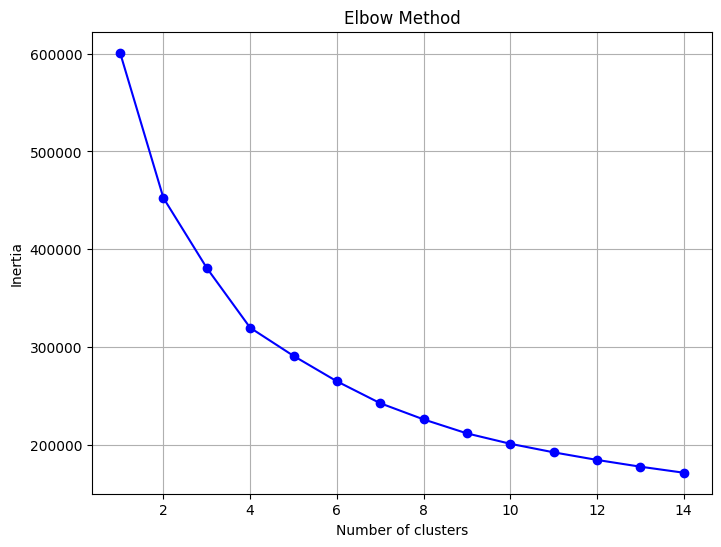

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering (you can adjust these)
selected_features = ['txns', 'atv_total','months_active','product_penetration','atv_total_qr','qr_ff','pos_ff']
X = data[selected_features]

# Standardize the data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
z_scores = np.abs(stats.zscore(X_scaled))
threshold = 3  # Adjust the threshold as needed

# Create a mask to filter out outliers
mask = (z_scores < threshold).all(axis=1)
data_no_outliers = X_scaled[mask]

# Determine the optimal number of clusters (e.g., using the Elbow method)
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_no_outliers)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to choose the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [24]:
k_values = range(1, 11)
sse = []  # Sum of Squared Errors for each K

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_no_outliers)
    sse.append(kmeans.inertia_)

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/

In [25]:
sse

[600941.3092755796,
 452434.20440356154,
 380880.3990782995,
 319815.252464421,
 291050.49396676576,
 265070.6339516437,
 242657.09970430224,
 226121.84155431524,
 212649.02107897738,
 201223.65162180824]

In [26]:
import seaborn as sns
from sklearn.cluster import KMeans

#Based on the Elbow method, choose an appropriate number of clusters
num_clusters = 4  # Adjust as needed

# Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Descriptive statistics for each cluster
cluster_stats = data.groupby('cluster')[selected_features].describe()

# Visualize the clusters
#sns.pairplot(data=data, hue='cluster', palette='Dark2')
#plt.show()

# Print cluster statistics
#print(cluster_stats)


/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
print(cluster_stats)

            txns                                                         \
           count         mean          std  min     25%     50%     75%   
cluster                                                                   
0        69540.0    39.787173    89.092664  1.0     4.0    13.0    36.0   
1        29586.0    98.152843   143.188527  1.0    23.0    54.0   117.0   
2        70980.0   185.755720   231.830782  1.0    49.0   103.0   221.0   
3         3895.0  2034.201540  1927.610900  1.0  1006.5  1636.0  2536.5   

                 atv_total                ...   qr_ff             pos_ff  \
             max     count          mean  ...     75%       max    count   
cluster                                   ...                              
0         2114.0   69540.0   7652.141534  ...   942.0   31087.0  69540.0   
1         5736.0   29586.0  36226.809272  ...   157.0   18400.0  29586.0   
2         2619.0   70980.0   9745.617160  ...  2017.0   35751.0  70980.0   
3        51065.0  

In [28]:
data.size

5742033

In [29]:
X.size

1218007

In [30]:
one = X_scaled.size
one

1218007

In [31]:
two = data_no_outliers.size
two

1120245

In [32]:
total_outliers = one-two
total_outliers

97762

In [33]:
data.groupby('cluster').describe()

merchant_id                                                 \
              count          mean           std     min        25%   
cluster                                                              
0           69540.0  2.392492e+07  1.519512e+07   442.0  8305973.5   
1           29586.0  1.970083e+07  1.399837e+07  1471.0  7095916.5   
2           70980.0  1.229120e+07  1.068157e+07    26.0  3945810.0   
3            3895.0  1.051169e+07  1.017758e+07   477.0  2626240.0   

                                             count_of_devices            ...  \
                50%          75%         max            count      mean  ...   
cluster                                                                  ...   
0        26942473.0  37675356.50  45225815.0          69540.0  1.004458  ...   
1        20546452.0  33315131.50  45177314.0          29586.0  1.007267  ...   
2         8637348.0  21592677.75  41693410.0          70980.0  1.011919  ...   
3         7442128.0  11920524.00  43947694.0           3895.0  1.050064  ...   

          qr_ff             pos_ff                                         \
            75%       max    count         mean          std  min     25%   
cluster                                                                     
0         942.0   31087.0  69540.0    40.205853   118.759656  1.0     3.0   
1         157.0   18400.0  29586.0    42.119482    86.156361  1.0     9.0   
2        2017.0   35751.0  70980.0   146.785587   208.731193  1.0    24.0   
3        9744.5  209237.0   3895.0  1860.232606  1382.937684  1.0  1059.0   

                                  
            50%     75%      max  
cluster                           
0           8.0    23.0   2075.0  
1          18.0    38.0   1644.0  
2          62.0   175.0   1953.0  
3        1529.0  2242.0  16610.0  

[4 rows x 240 columns]

In [34]:
cluster_stats = data.groupby('cluster')[selected_features].describe()

In [36]:
data.groupby(['cluster'])[['atv_total','txns','months_active','product_penetration','atv_total_qr','qr_ff','pos_ff']].mean().reset_index().to_csv("cluster_info.csv", index = False)

In [39]:
heatmap_plot = data.groupby(['cluster'])[['atv_total','txns','months_active','product_penetration','atv_total_qr','qr_ff','pos_ff']].mean().reset_index()

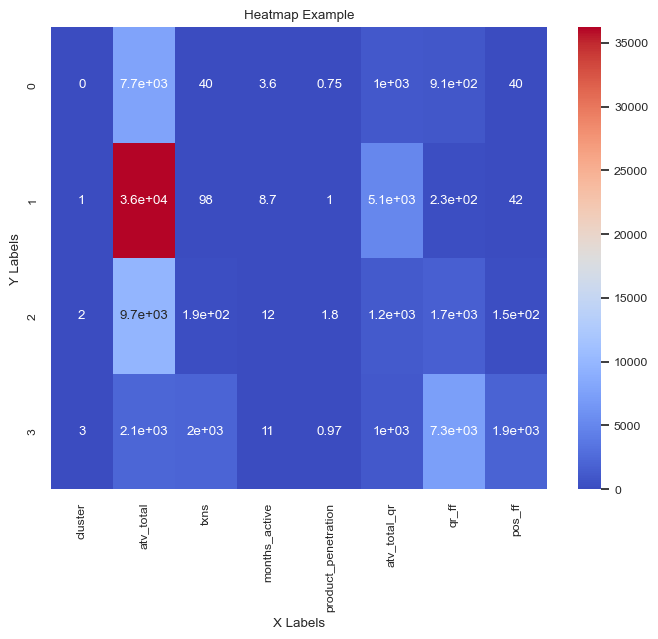

In [41]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)  # Adjust the font scale as needed (smaller value for smaller font)

# Use the heatmap function to plot the correlation matrix
# You can also specify a color map (cmap) and annot=True to display values
heatmap = sns.heatmap(heatmap_plot, annot=True, cmap="coolwarm")

# Add labels and a title
plt.xlabel("X Labels")
plt.ylabel("Y Labels")
plt.title("Heatmap Example")

# Display the heatmap
plt.show()

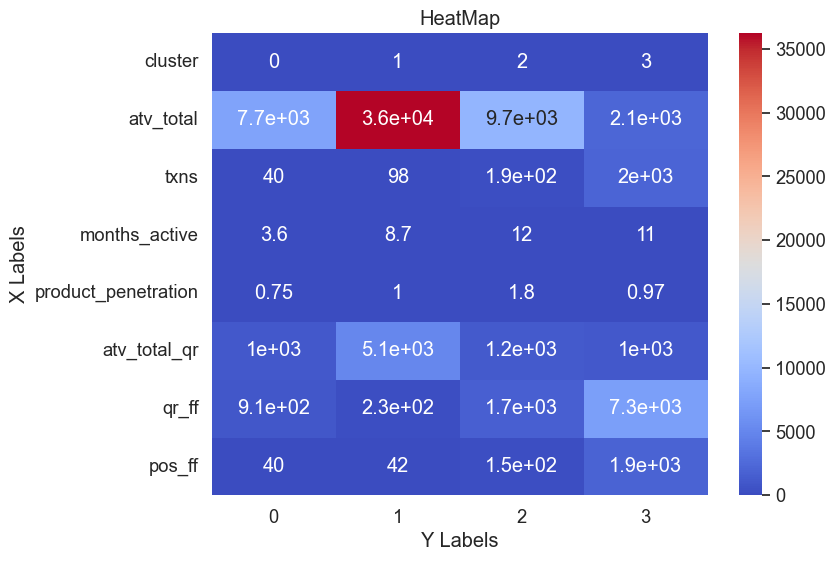

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the heatmap_plot data
# Transpose the heatmap_plot data to rotate it by 90 degrees
heatmap_plot_transposed = heatmap_plot.T

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font size as needed

# Use the heatmap function to plot the transposed data
# You can also specify a color map (cmap) and annot=True to display values
heatmap = sns.heatmap(heatmap_plot_transposed, annot=True, cmap="coolwarm")

# Swap X and Y labels to rotate the plot
plt.xlabel("Y Labels")  # X and Y labels are swapped
plt.ylabel("X Labels")  # X and Y labels are swapped
plt.title("HeatMap")

# Display the rotated heatmap
plt.show()


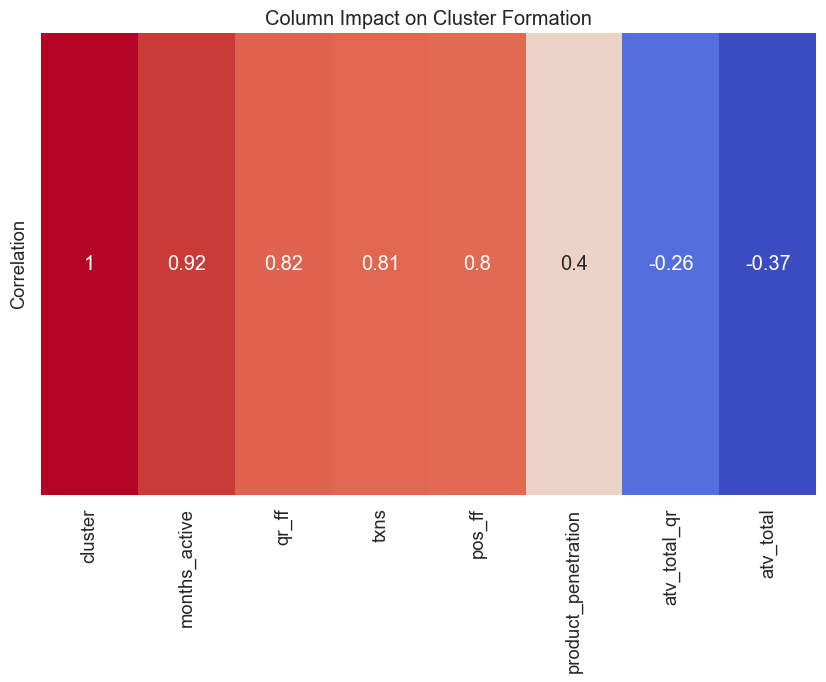

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns and a 'cluster' column
# Replace this with your actual data

# Calculate the correlation between columns and cluster labels
correlation_matrix = heatmap_plot.corrwith(heatmap_plot['cluster'])

# Create a DataFrame from the correlation values
correlation_df = pd.DataFrame({'Correlation': correlation_matrix})

# Sort the DataFrame by correlation values
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font size as needed

# Use the heatmap function to plot the correlation values
heatmap = sns.heatmap(correlation_df.T, cmap='coolwarm', annot=True, cbar=False)


plt.title('Column Impact on Cluster Formation')

# Display the heatmap
plt.show()


In [46]:
cluster_stats

txns                                                         \
           count         mean          std  min     25%     50%     75%   
cluster                                                                   
0        69540.0    39.787173    89.092664  1.0     4.0    13.0    36.0   
1        29586.0    98.152843   143.188527  1.0    23.0    54.0   117.0   
2        70980.0   185.755720   231.830782  1.0    49.0   103.0   221.0   
3         3895.0  2034.201540  1927.610900  1.0  1006.5  1636.0  2536.5   

                 atv_total                ...   qr_ff             pos_ff  \
             max     count          mean  ...     75%       max    count   
cluster                                   ...                              
0         2114.0   69540.0   7652.141534  ...   942.0   31087.0  69540.0   
1         5736.0   29586.0  36226.809272  ...   157.0   18400.0  29586.0   
2         2619.0   70980.0   9745.617160  ...  2017.0   35751.0  70980.0   
3        51065.0    3895.0   2129.815438  ...  9744.5  209237.0   3895.0   

                                                                         
                mean          std  min     25%     50%     75%      max  
cluster                                                                  
0          40.205853   118.759656  1.0     3.0     8.0    23.0   2075.0  
1          42.119482    86.156361  1.0     9.0    18.0    38.0   1644.0  
2         146.785587   208.731193  1.0    24.0    62.0   175.0   1953.0  
3        1860.232606  1382.937684  1.0  1059.0  1529.0  2242.0  16610.0  

[4 rows x 56 columns]

In [47]:
cluster_stats.to_csv('segment_swipe.csv')

No Outliers columns merged

In [49]:
data_k=pd.DataFrame(data_no_outliers,columns=['atv_total','txns','months_active','product_penetration','atv_total_qr','qr_ff','pos_ff'])

merged_data = data.merge(data_k, left_index=True, right_index=True, how='inner', suffixes=('', '_no_outliers'))

merged_data['cluster'] = kmeans.fit_predict(merged_data[['atv_total_no_outliers', 'product_penetration_no_outliers',
        'months_active_no_outliers', 'txns_no_outliers']])

merged_data.columns

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Index(['merchant_id', 'count_of_devices', 'txns', 'tpv', 'atv_total',
       'months_active', 'last_txn_date', 'first_txn_date', 'DC_txns', 'DC_tpv',
       'CC_txns', 'CC_tpv', 'txns_qr', 'tpv_qr', 'first_qr_txn', 'last_qr_txn',
       'qr_txn_tag', 'atv_total_qr', 'swipe_flag', 'loan_flag',
       'active_loan_flag', 'ins_flag', 'fp_flag', 'club_flag', 'credit_flag',
       'debit_flag', 'product_penetration', 'std_category', 'merchant_city',
       'total_payers', 'qr_ff', 'pos_ff', 'cluster', 'atv_total_no_outliers',
       'txns_no_outliers', 'months_active_no_outliers',
       'product_penetration_no_outliers', 'atv_total_qr_no_outliers',
       'qr_ff_no_outliers', 'pos_ff_no_outliers'],
      dtype='object')

In [50]:
k=['count_of_devices', 'txns', 'tpv', 'months_active',
       'last_txn_date', 'first_txn_date', 'DC_txns', 'DC_tpv', 'CC_txns',
       'CC_tpv', 'txns_qr', 'tpv_qr', 'first_qr_txn', 'last_qr_txn',
       'qr_txn_tag','atv_total_qr', 'swipe_flag', 'loan_flag', 'active_loan_flag', 'ins_flag',
       'fp_flag', 'club_flag', 'credit_flag', 'debit_flag',
       'product_penetration', 'std_category', 'merchant_city','qr_ff','pos_ff', 'cluster']

for i in k:
        merged_data[i] = pd.to_numeric(merged_data[i], errors='coerce').astype(np.float64)

In [51]:
cluster_stats_no_outliers = merged_data.groupby('cluster')[selected_features].describe()

In [52]:
cluster_stats_no_outliers.to_csv('segment_swipe_no_outliers.csv')

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


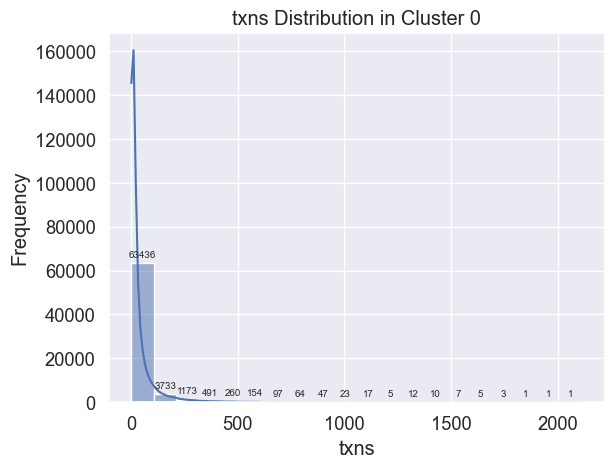

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


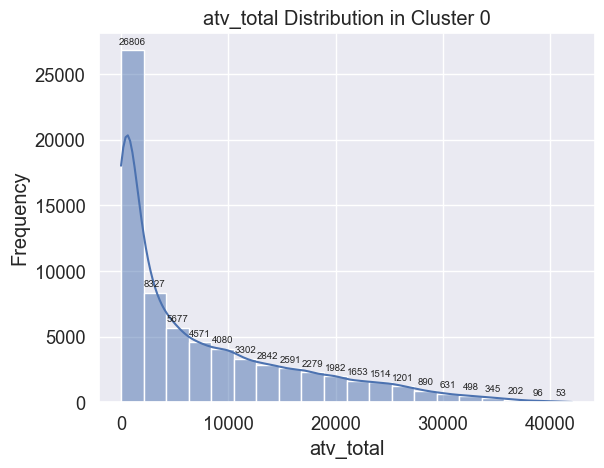

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


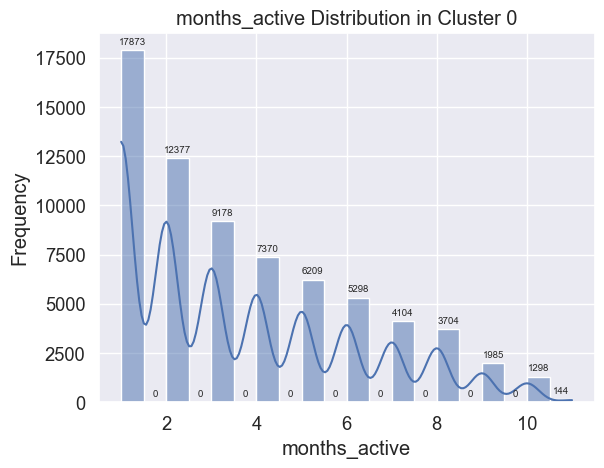

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


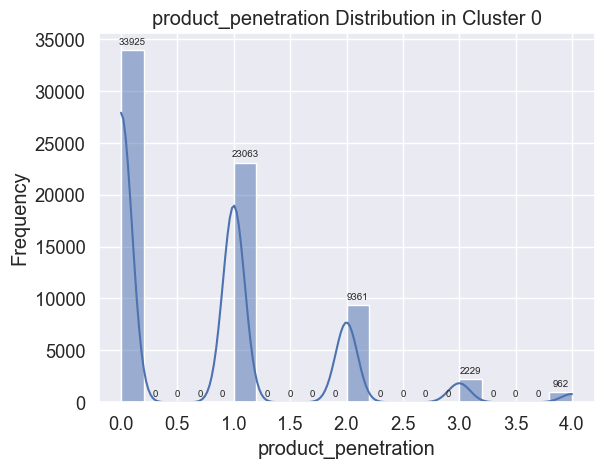

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


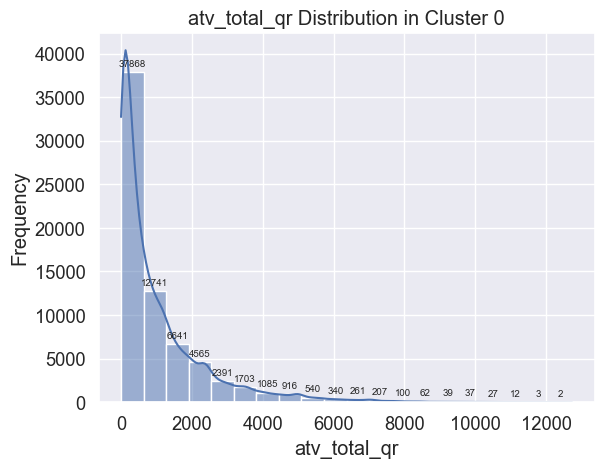

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


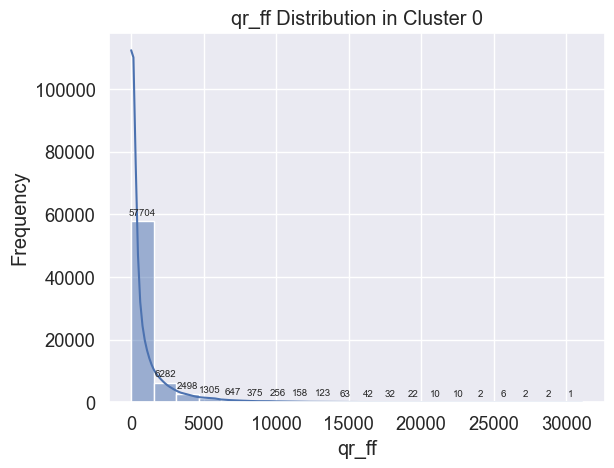

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


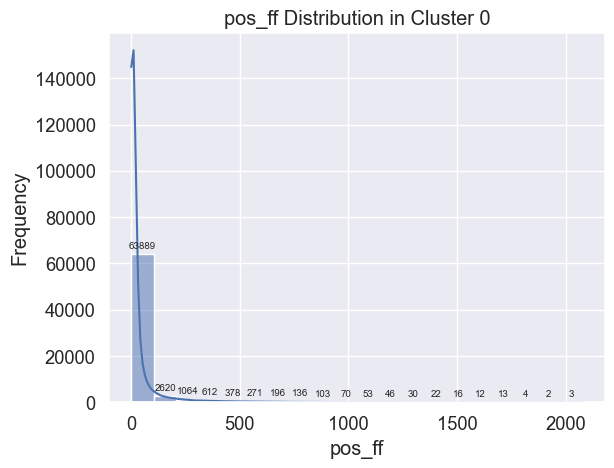

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt  # You need to import matplotlib for the plot

cluster_data = data[data['cluster'] == 0]

# Calculate summary statistics for the selected features within the cluster
summary_stats = cluster_data[selected_features].describe()

for feature in selected_features:
    ax = sns.histplot(data=cluster_data, x=feature, bins=20, kde=True)
    plt.title(f'{feature} Distribution in Cluster 0')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Annotate the bars with their heights
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',size =7,
                    ha='center', va='bottom')

    plt.show()

# bar_heights = [rect.get_height() for rect in ax.patches]
# print("Bar Heights:", bar_heights)



/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


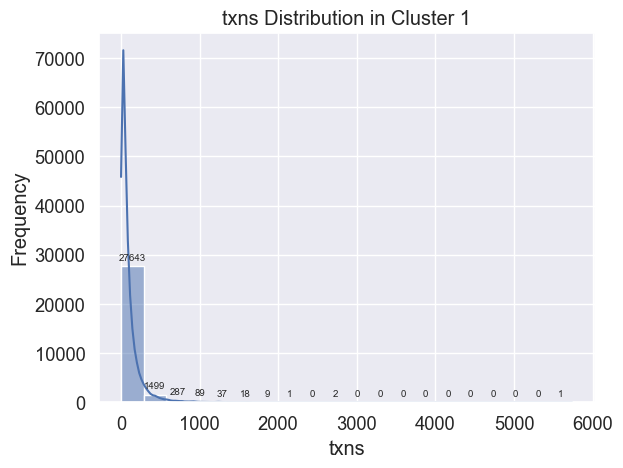

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


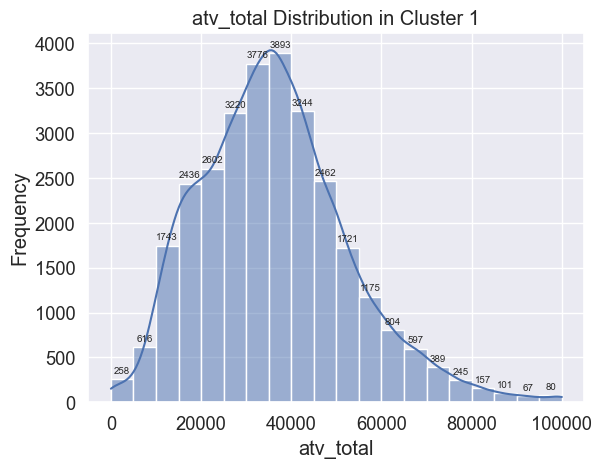

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


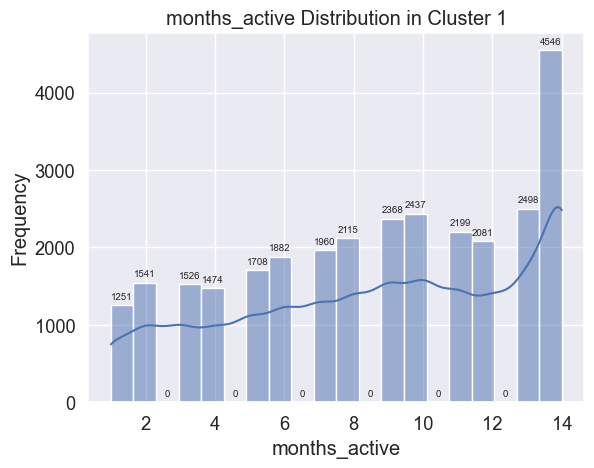

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


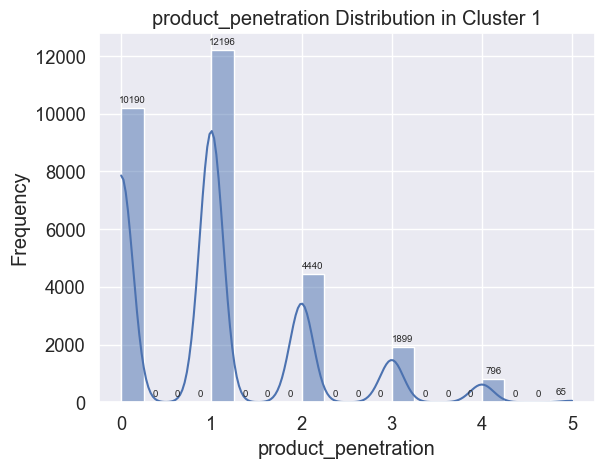

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


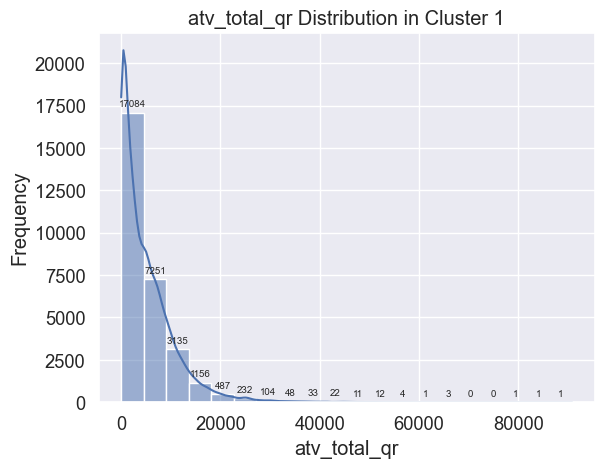

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


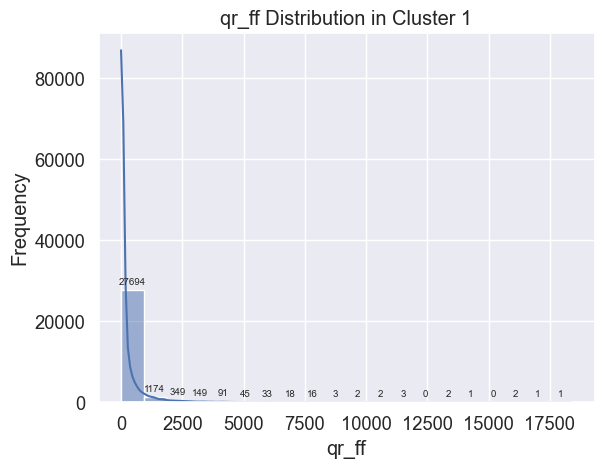

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


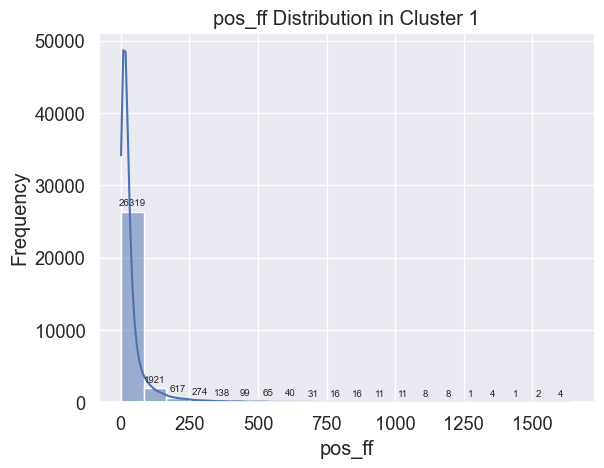

In [55]:
cluster_data = data[data['cluster'] == 1]

# Calculate summary statistics for the selected features within the cluster
summary_stats = cluster_data[selected_features].describe()

for feature in selected_features:
    ax = sns.histplot(data=cluster_data, x=feature, bins=20, kde=True)
    plt.title(f'{feature} Distribution in Cluster 1')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Annotate the bars with their heights
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',size =7,
                    ha='center', va='bottom')

    plt.show()

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


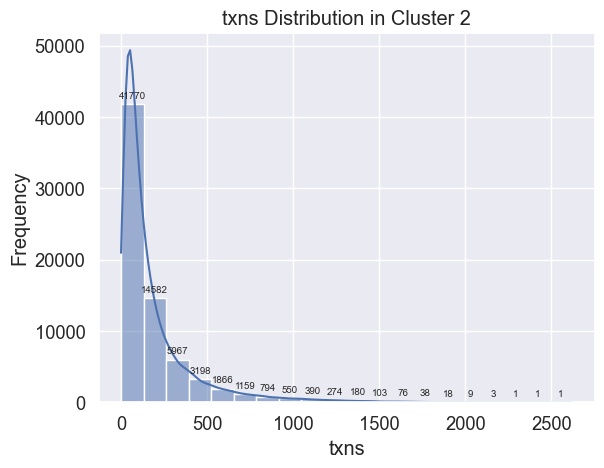

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


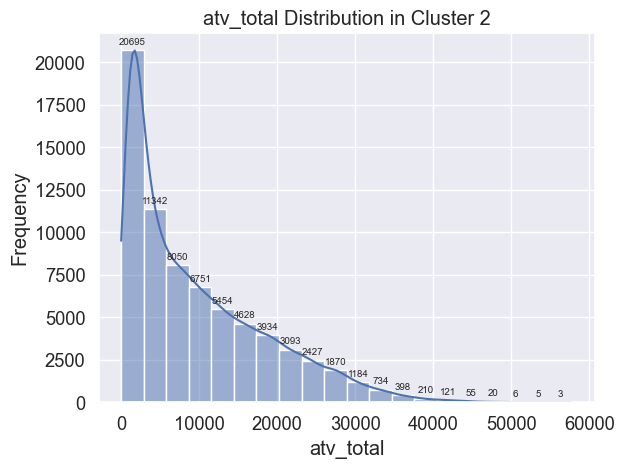

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


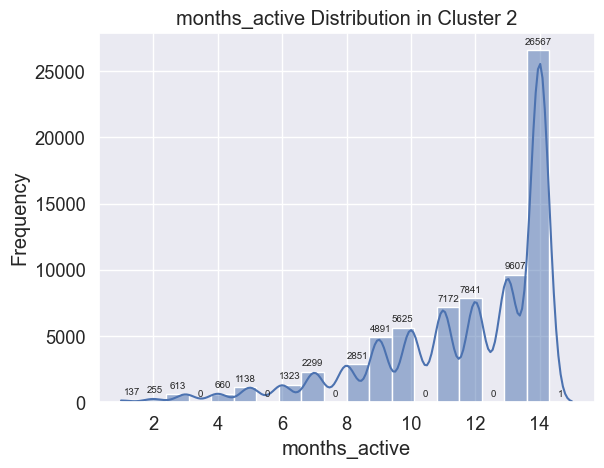

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


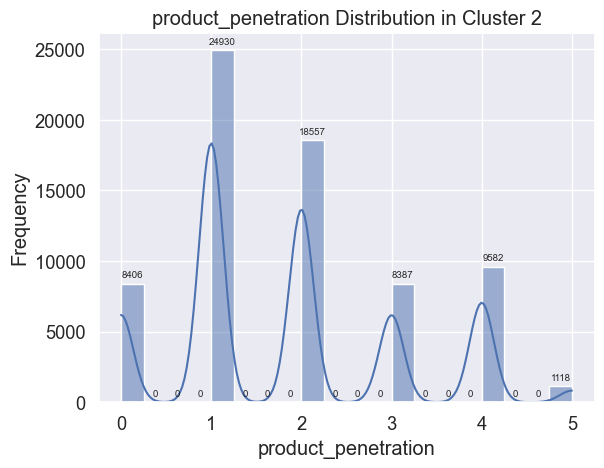

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


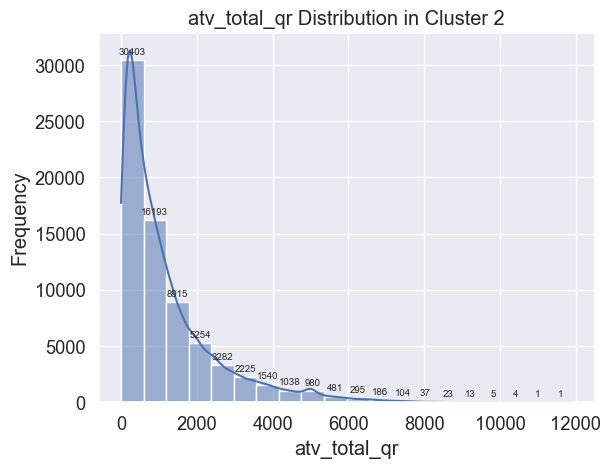

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


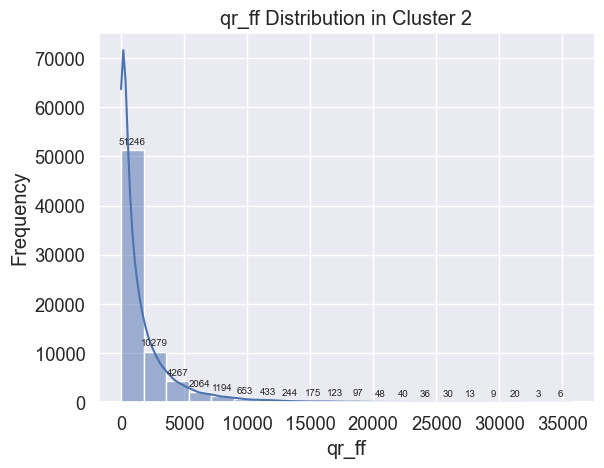

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


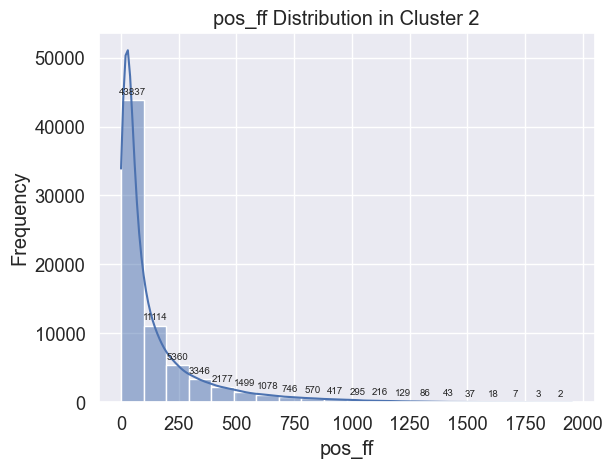

In [56]:
cluster_data = data[data['cluster'] == 2]

# Calculate summary statistics for the selected features within the cluster
summary_stats = cluster_data[selected_features].describe()

for feature in selected_features:
    ax = sns.histplot(data=cluster_data, x=feature, bins=20, kde=True)
    plt.title(f'{feature} Distribution in Cluster 2')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Annotate the bars with their heights
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',size =7,
                    ha='center', va='bottom')

    plt.show()

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


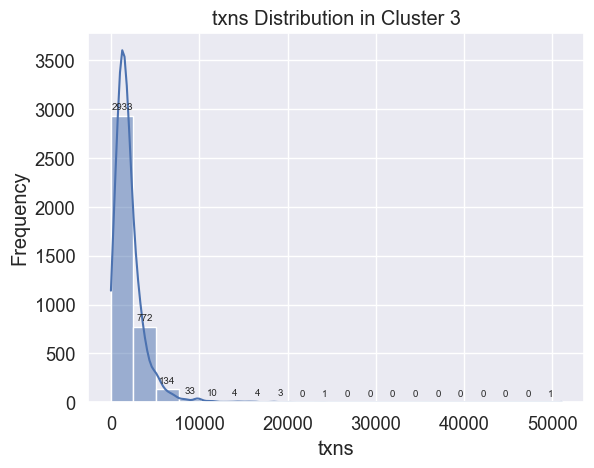

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


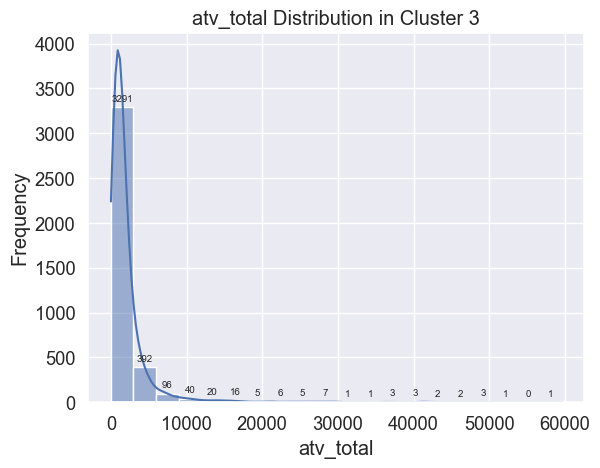

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


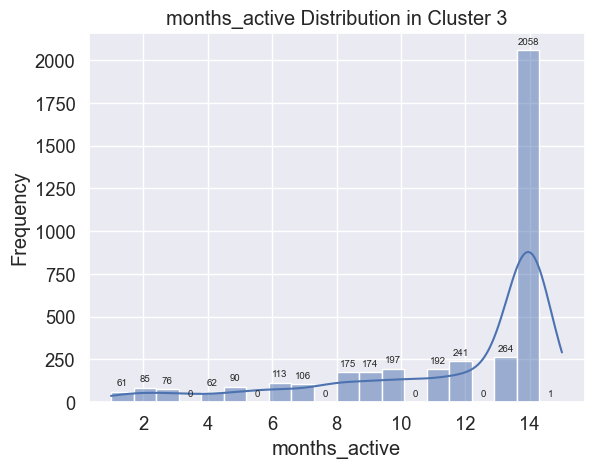

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


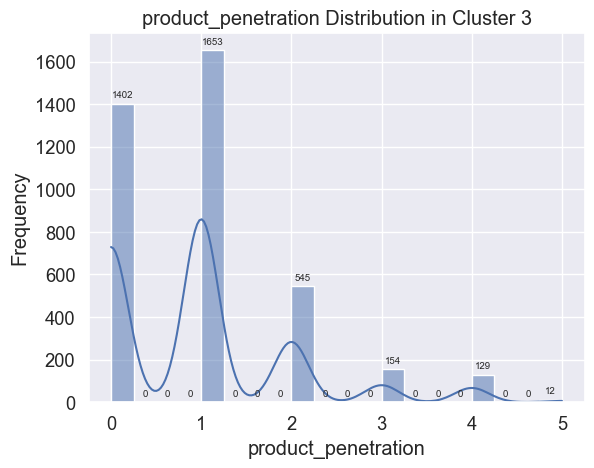

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


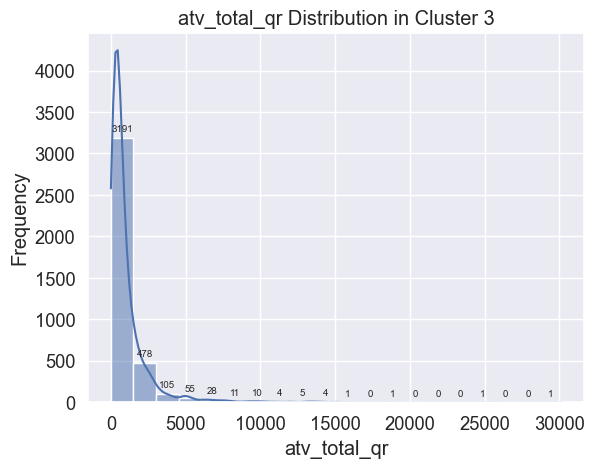

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


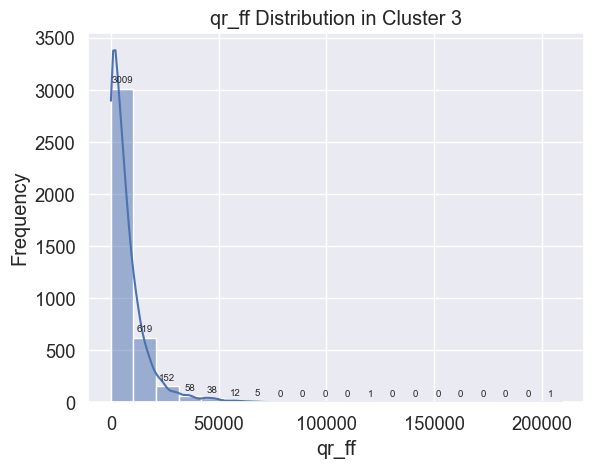

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


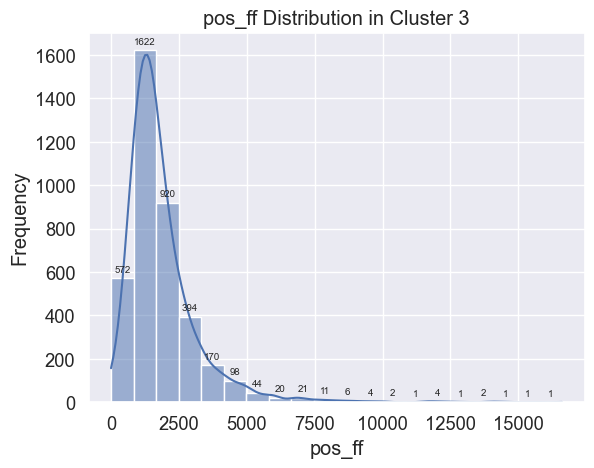

In [57]:
cluster_data = data[data['cluster'] == 3]

# Calculate summary statistics for the selected features within the cluster
summary_stats = cluster_data[selected_features].describe()

for feature in selected_features:
    ax = sns.histplot(data=cluster_data, x=feature, bins=20, kde=True)
    plt.title(f'{feature} Distribution in Cluster 3')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Annotate the bars with their heights
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',size =7,
                    ha='center', va='bottom')

    plt.show()

In [58]:
cluster_data[selected_features].corr()

,txns,atv_total,months_active,product_penetration,atv_total_qr,qr_ff,pos_ff
txns,1.000000,-0.114594,0.239888,-0.026261,-0.062174,-0.068374,0.381772
atv_total,-0.114594,1.000000,-0.014729,0.022419,0.444834,0.023373,-0.024638
months_active,0.239888,-0.014729,1.000000,-0.008686,0.007436,-0.194432,-0.111767
product_penetration,-0.026261,0.022419,-0.008686,1.000000,-0.118330,0.107792,-0.098521
atv_total_qr,-0.062174,0.444834,0.007436,-0.118330,1.000000,-0.177215,0.091344
qr_ff,-0.068374,0.023373,-0.194432,0.107792,-0.177215,1.000000,0.019983
pos_ff,0.381772,-0.024638,-0.111767,-0.098521,0.091344,0.019983,1.000000


In [59]:
data1 = data

In [60]:
data1.groupby('cluster').describe().reset_index().to_csv('check_segment.csv')

k=['count_of_devices', 'txns', 'tpv', 'months_active',
       'last_txn_date', 'first_txn_date', 'DC_txns', 'DC_tpv', 'CC_txns',
       'CC_tpv', 'txns_qr', 'tpv_qr', 'first_qr_txn', 'last_qr_txn',
       'qr_txn_tag','atv_total_qr', 'swipe_flag', 'loan_flag', 'active_loan_flag', 'ins_flag',
       'fp_flag', 'club_flag', 'credit_flag', 'debit_flag',
       'product_penetration', 'std_category', 'merchant_city','qr_ff','pos_ff', 'cluster']


for i in k:
        data1[i] = pd.to_numeric(data1[i], errors='coerce').astype(np.float64)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174001 entries, 0 to 174000
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   merchant_id          174001 non-null  int64  
 1   count_of_devices     174001 non-null  float64
 2   txns                 174001 non-null  float64
 3   tpv                  174001 non-null  float64
 4   atv_total            174001 non-null  float64
 5   months_active        174001 non-null  float64
 6   last_txn_date        174001 non-null  float64
 7   first_txn_date       174001 non-null  float64
 8   DC_txns              174001 non-null  float64
 9   DC_tpv               174001 non-null  float64
 10  CC_txns              174001 non-null  float64
 11  CC_tpv               174001 non-null  float64
 12  txns_qr              174001 non-null  float64
 13  tpv_qr               174001 non-null  float64
 14  first_qr_txn         174001 non-null  float64
 15  last_qr_txn      

In [61]:
selected_features

['txns',
 'atv_total',
 'months_active',
 'product_penetration',
 'atv_total_qr',
 'qr_ff',
 'pos_ff']

In [62]:
cluster_data = data[data['cluster'] == 0]
total_txns_cluster_0 = cluster_data['txns'].sum()

cluster_data = data[data['cluster'] == 1]
total_txns_cluster_1 = cluster_data['txns'].sum()

cluster_data = data[data['cluster'] == 2]
total_txns_cluster_2 = cluster_data['txns'].sum()

cluster_data = data[data['cluster'] == 3]
total_txns_cluster_3 = cluster_data['txns'].sum()



cluster_data = data[data['cluster'] == 0]
atv_total_cluster_0 = cluster_data['atv_total'].sum()

cluster_data = data[data['cluster'] == 1]
atv_total_cluster_1 = cluster_data['atv_total'].sum()

cluster_data = data[data['cluster'] == 2]
atv_total_cluster_2 = cluster_data['atv_total'].sum()

cluster_data = data[data['cluster'] == 3]
atv_total_cluster_3 = cluster_data['atv_total'].sum()


cluster_data = data[data['cluster'] == 0]
pp_cluster_0 = cluster_data['product_penetration'].sum()

cluster_data = data[data['cluster'] == 1]
pp_cluster_1 = cluster_data['product_penetration'].sum()

cluster_data = data[data['cluster'] == 2]
pp_cluster_2 = cluster_data['product_penetration'].sum()

cluster_data = data[data['cluster'] == 3]
pp_cluster_3 = cluster_data['product_penetration'].sum()


cluster_data = data[data['cluster'] == 0]
ma_cluster_0 = cluster_data['months_active'].sum()

cluster_data = data[data['cluster'] == 1]
ma_cluster_1 = cluster_data['months_active'].sum()

cluster_data = data[data['cluster'] == 2]
ma_cluster_2 = cluster_data['months_active'].sum()

cluster_data = data[data['cluster'] == 3]
ma_cluster_3 = cluster_data['months_active'].sum()

cluster_data = data[data['cluster'] == 0]
atvqr_cluster_0 = cluster_data['atv_total_qr'].sum()

cluster_data = data[data['cluster'] == 1]
atvqr_cluster_1 = cluster_data['atv_total_qr'].sum()

cluster_data = data[data['cluster'] == 2]
atvqr_cluster_2 = cluster_data['atv_total_qr'].sum()

cluster_data = data[data['cluster'] == 3]
atvqr_cluster_3 = cluster_data['atv_total_qr'].sum()

cluster_data = data[data['cluster'] == 0]
qrff_cluster_0 = cluster_data['qr_ff'].sum()

cluster_data = data[data['cluster'] == 1]
qrff_cluster_1 = cluster_data['qr_ff'].sum()

cluster_data = data[data['cluster'] == 2]
qrff_cluster_2 = cluster_data['qr_ff'].sum()

cluster_data = data[data['cluster'] == 3]
qrff_cluster_3 = cluster_data['qr_ff'].sum()

cluster_data = data[data['cluster'] == 0]
posff_cluster_0 = cluster_data['pos_ff'].sum()

cluster_data = data[data['cluster'] == 1]
posff_cluster_1 = cluster_data['pos_ff'].sum()

cluster_data = data[data['cluster'] == 2]
posff_cluster_2 = cluster_data['pos_ff'].sum()

cluster_data = data[data['cluster'] == 3]
posff_cluster_3 = cluster_data['pos_ff'].sum()




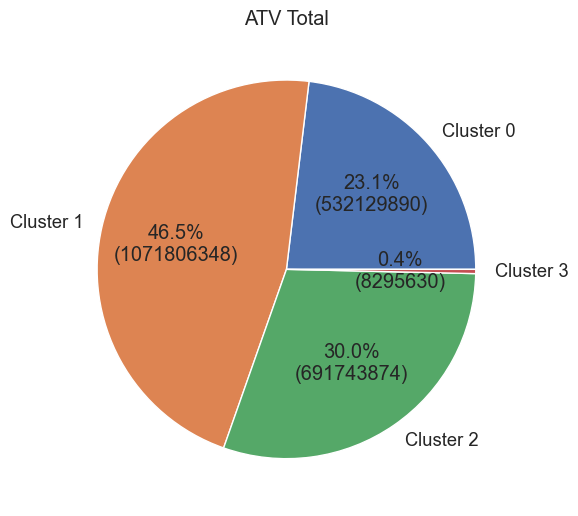

In [63]:
import matplotlib.pyplot as plt

x = [ atv_total_cluster_0,atv_total_cluster_1,atv_total_cluster_2,atv_total_cluster_3]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig, ax = plt.subplots(figsize=(6, 6))

# Define a function to format labels with both percentages and values
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Use autopct with the custom function to format the labels
ax.pie(x, labels=labels, autopct=lambda pct: func(pct, x))

ax.set_title('ATV Total')
plt.tight_layout()
plt.show()

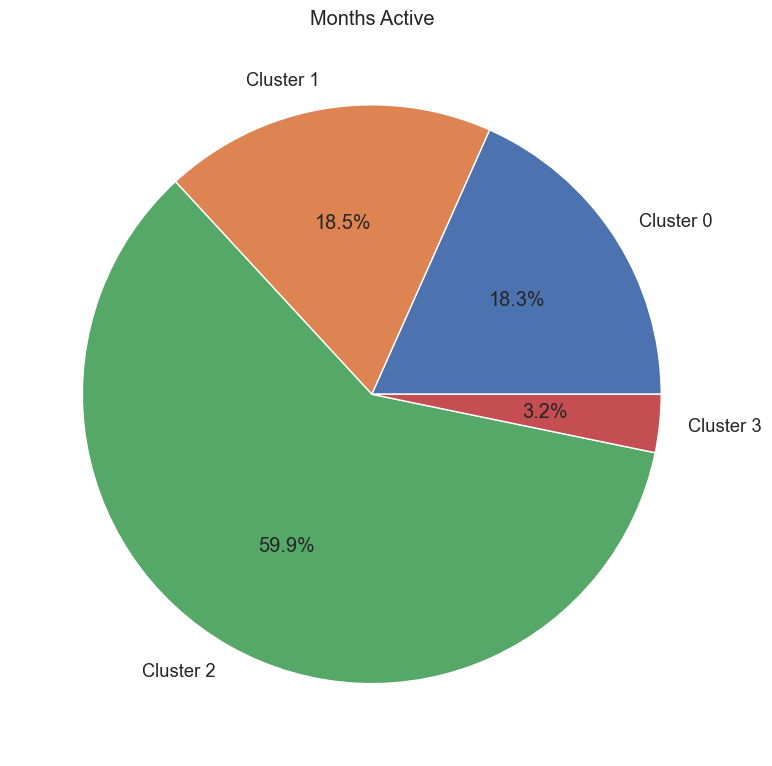

In [64]:
x = [ma_cluster_0,ma_cluster_1,ma_cluster_2,ma_cluster_3,]
labels = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3',]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Months Active')
plt.tight_layout()

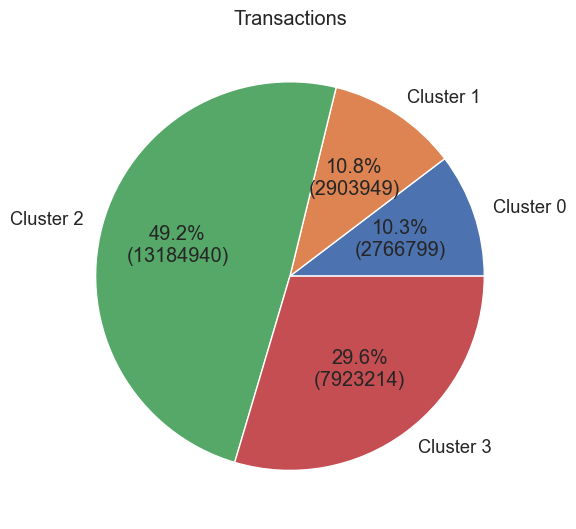

In [65]:
import matplotlib.pyplot as plt

x = [total_txns_cluster_0, total_txns_cluster_1, total_txns_cluster_2, total_txns_cluster_3]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig, ax = plt.subplots(figsize=(6, 6))

# Define a function to format labels with both percentages and values
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Use autopct with the custom function to format the labels
ax.pie(x, labels=labels, autopct=lambda pct: func(pct, x))

ax.set_title('Transactions')
plt.tight_layout()
plt.show()


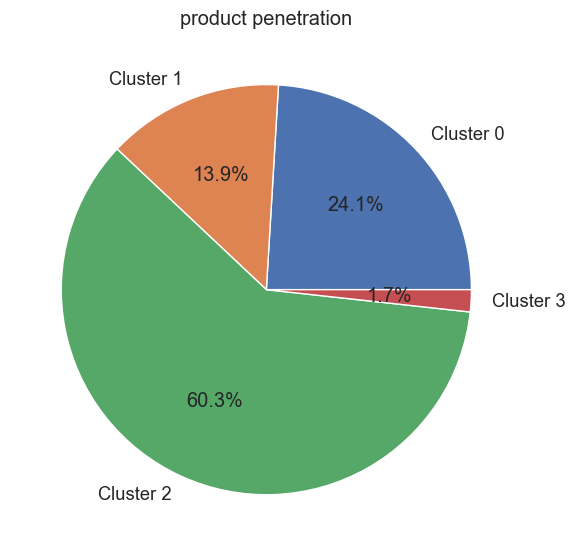

In [66]:
x = [pp_cluster_0,pp_cluster_1,pp_cluster_2,pp_cluster_3]
labels = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('product penetration')
plt.tight_layout()

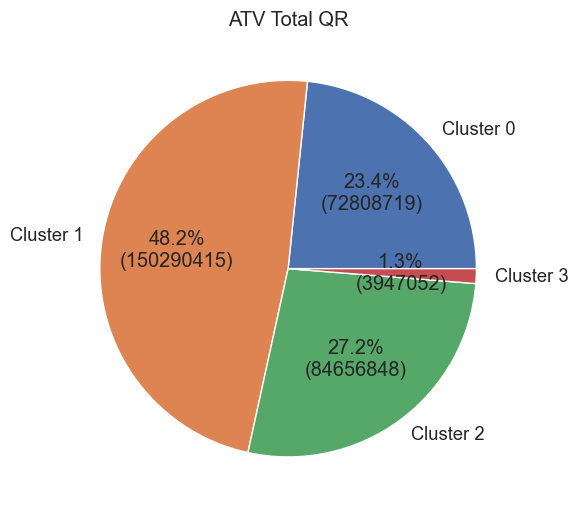

In [67]:
x = [ atvqr_cluster_0,atvqr_cluster_1,atvqr_cluster_2,atvqr_cluster_3]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig, ax = plt.subplots(figsize=(6, 6))

# Define a function to format labels with both percentages and values
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Use autopct with the custom function to format the labels
ax.pie(x, labels=labels, autopct=lambda pct: func(pct, x))

ax.set_title('ATV Total QR')
plt.tight_layout()
plt.show()

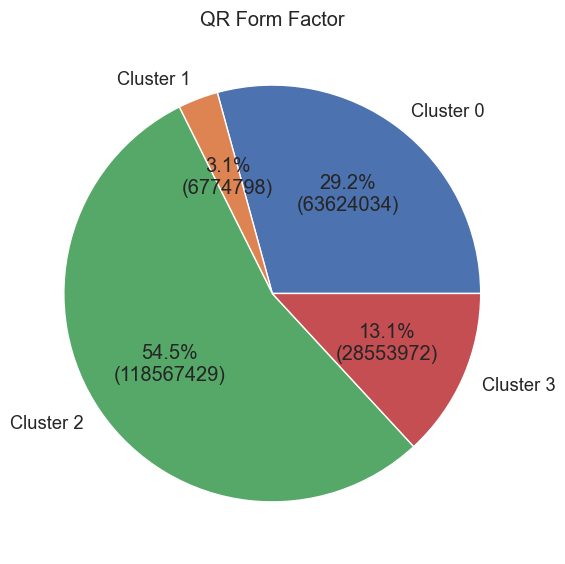

In [69]:
x = [ qrff_cluster_0,qrff_cluster_1,qrff_cluster_2,qrff_cluster_3]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig, ax = plt.subplots(figsize=(6, 6))

# Define a function to format labels with both percentages and values
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Use autopct with the custom function to format the labels
ax.pie(x, labels=labels, autopct=lambda pct: func(pct, x))

ax.set_title('QR Form Factor')
plt.tight_layout()
plt.show()

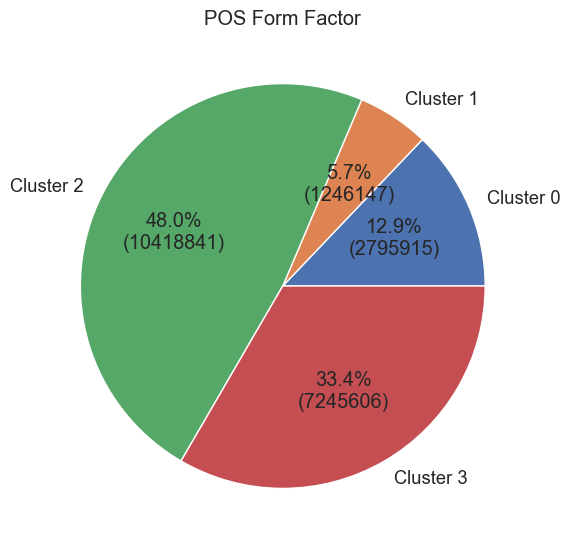

In [71]:
x = [ posff_cluster_0,posff_cluster_1,posff_cluster_2,posff_cluster_3]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig, ax = plt.subplots(figsize=(6, 6))

# Define a function to format labels with both percentages and values
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Use autopct with the custom function to format the labels
ax.pie(x, labels=labels, autopct=lambda pct: func(pct, x))

ax.set_title('POS Form Factor')
plt.tight_layout()
plt.show()

In [72]:
total_pos_ff = posff_cluster_0 + posff_cluster_1 + posff_cluster_2 + posff_cluster_3
total_qr_ff = qrff_cluster_0 + qrff_cluster_1 + qrff_cluster_2 + qrff_cluster_3

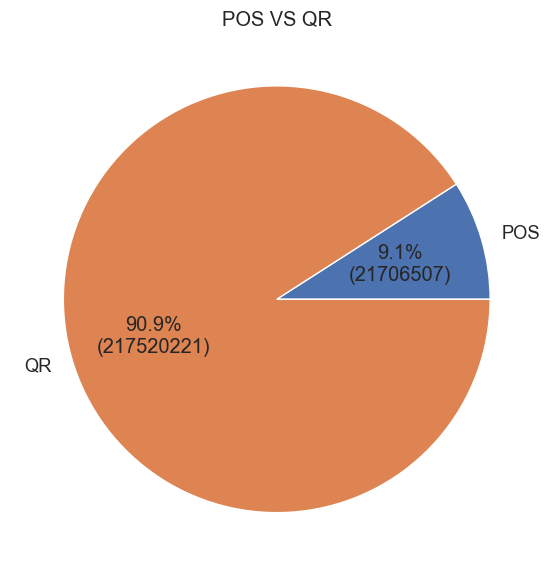

In [73]:
x = [total_pos_ff,total_qr_ff]
labels = ['POS','QR']

fig, ax = plt.subplots(figsize=(6, 6))

# Define a function to format labels with both percentages and values
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Use autopct with the custom function to format the labels
ax.pie(x, labels=labels, autopct=lambda pct: func(pct, x))

ax.set_title('POS VS QR')
plt.tight_layout()
plt.show()

In [268]:
data1 = pd.read_csv('segmentation (1).csv')

In [269]:
data1['cluster'] = data['cluster']

In [270]:
data1

,merchant_id,count_of_devices,txns,tpv,atv_total,months_active,last_txn_date,first_txn_date,DC_txns,DC_tpv,...,active_loan_flag,ins_flag,fp_flag,club_flag,credit_flag,debit_flag,product_penetration,std_category,merchant_city,cluster
0,6199206,1,1655,1138196.39,687.731958,9,2023-03-14,2022-07-16,597,419320.64,...,0,0,0,0,0,0,0,MEDICAL_HEALTH CARE,Delhi,3.0
1,619213,1,74,422328.00,5707.135135,13,2023-07-21,2022-07-26,43,248380.00,...,0,0,0,0,0,0,0,RETAIL OUTLET,Bengaluru,1.0
2,7861088,1,164,3992816.00,24346.439024,13,2023-07-20,2022-07-18,24,388162.00,...,0,0,0,0,0,0,0,RETAIL OUTLET,NaN,1.0
3,5905645,1,18,36720.00,2040.000000,3,2023-07-18,2023-05-15,6,12420.00,...,0,0,0,0,0,0,0,HOME UTILITIES,NaN,2.0
4,7507305,1,37,732592.00,19799.783784,12,2023-07-15,2022-08-04,3,14000.00,...,0,0,0,0,0,0,0,JEWELLERY,Vijaywada,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166384,900865,1,35,477059.00,13630.257143,12,2023-06-22,2022-07-19,4,9510.00,...,0,0,1,1,1,1,5,ELECTRONICS & DURABLES,Delhi,1.0
166385,688188,1,55,191945.00,3489.909091,8,2023-05-19,2022-10-16,23,48260.00,...,1,0,1,1,1,1,5,FASHION,NaN,1.0
166386,8808307,1,108,169295.00,1567.546296,7,2023-07-30,2022-09-04,46,26285.00,...,1,0,1,1,1,1,5,FASHION,Hyderabad,1.0
166387,24442358,1,147,4485534.99,30513.843469,4,2023-07-05,2023-04-07,0,NaN,...,1,0,1,1,1,1,5,DAIRY_FRESH PRODUCTS,Hyderabad,0.0


In [278]:
std_cluster = data1['std_category'].value_counts().groupby(data1['cluster']).describe 

In [279]:
print(std_cluster)

<bound method SeriesGroupBy.describe of <pandas.core.groupby.generic.SeriesGroupBy object at 0x147fdae10>>


In [280]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [301]:
data

,merchant_id,count_of_devices,txns,tpv,atv_total,months_active,last_txn_date,first_txn_date,DC_txns,DC_tpv,...,active_loan_flag,ins_flag,fp_flag,club_flag,credit_flag,debit_flag,product_penetration,std_category,merchant_city,cluster
0,6199206,1.0,1655.0,1138196.39,687.731958,9.0,0.0,0.0,597.0,419320.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0
1,619213,1.0,74.0,422328.00,5707.135135,13.0,0.0,0.0,43.0,248380.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
2,7861088,1.0,164.0,3992816.00,24346.439024,13.0,0.0,0.0,24.0,388162.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
3,5905645,1.0,18.0,36720.00,2040.000000,3.0,0.0,0.0,6.0,12420.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0
4,7507305,1.0,37.0,732592.00,19799.783784,12.0,0.0,0.0,3.0,14000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166384,900865,1.0,35.0,477059.00,13630.257143,12.0,0.0,0.0,4.0,9510.00,...,0.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1.0
166385,688188,1.0,55.0,191945.00,3489.909091,8.0,0.0,0.0,23.0,48260.00,...,1.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1.0
166386,8808307,1.0,108.0,169295.00,1567.546296,7.0,0.0,0.0,46.0,26285.00,...,1.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1.0
166387,24442358,1.0,147.0,4485534.99,30513.843469,4.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,0.0


In [289]:
DBdata = data['cluster']

In [290]:
DBdata

0         3.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
166384    1.0
166385    1.0
166386    1.0
166387    0.0
166388    1.0
Name: cluster, Length: 166389, dtype: float64

In [299]:
# Load data in X
X, DBdata = make_blobs(n_samples=400, centers=4,
					cluster_std=0.50, random_state=0)


In [305]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = 4

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


['y', 'b', 'g', 'r']


IndexError: index 2 is out of bounds for axis 1 with size 2

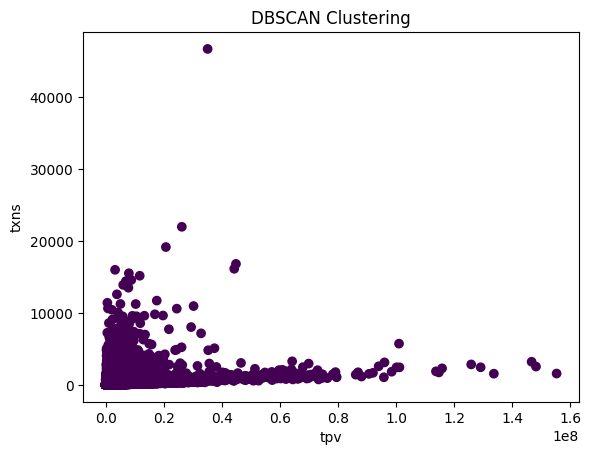

In [52]:
# plt.scatter(data1['tpv'], data['txns'], c=cluster_labels, cmap='viridis')
# plt.xlabel('tpv')
# plt.ylabel('txns')
# plt.title('DBSCAN Clustering')
# plt.show()

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/

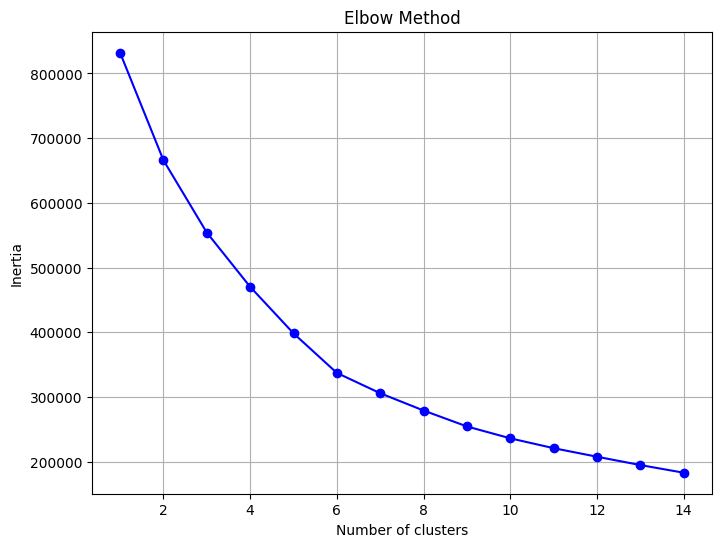

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset, replace 'data.csv' with your file
#data = pd.read_csv('data.csv')

# Select features for clustering (you can adjust these)
selected_features = ['txns', 'atv_total','tpv',
       'months_active', 
       'product_penetration']
X = data[selected_features]

# Standardize the data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Determine the optimal number of clusters (e.g., using the Elbow method)
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to choose the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters
# num_clusters = 3  # Adjust as needed

# # Perform k-means clustering with the chosen number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# data['cluster'] = kmeans.fit_predict(X_scaled)

# # Descriptive statistics for each cluster
# cluster_stats = data.groupby('cluster')[selected_features].describe()

# # Visualize the clusters
# sns.pairplot(data=data, hue='cluster', palette='Dark2')
# plt.show()

# # Print cluster statistics
# print(cluster_stats)


In [51]:
# Based on the Elbow method, choose an appropriate number of clusters
num_clusters = 4  # Adjust as needed

# # Perform k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# # Descriptive statistics for each cluster
cluster_stats = data.groupby('cluster')[selected_features].describe()

# # Visualize the clusters
# sns.pairplot(data=data, hue='cluster', palette='Dark2')
# plt.show()

# # Print cluster statistics
# print(cluster_stats)

/Users/sparshindurkar/Desktop/Swipe/myenv1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
cluster_stats.to_csv('scaled_segment.csv')

In [53]:
data

,merchant_id,count_of_devices,txns,tpv,atv_total,months_active,last_txn_date,first_txn_date,DC_txns,DC_tpv,...,active_loan_flag,ins_flag,fp_flag,club_flag,credit_flag,debit_flag,product_penetration,std_category,merchant_city,cluster
0,6199206,1.0,1655.0,1138196.39,687.731958,9.0,0.0,0.0,597.0,419320.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
1,619213,1.0,74.0,422328.00,5707.135135,13.0,0.0,0.0,43.0,248380.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
2,7861088,1.0,164.0,3992816.00,24346.439024,13.0,0.0,0.0,24.0,388162.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3,5905645,1.0,18.0,36720.00,2040.000000,3.0,0.0,0.0,6.0,12420.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3
4,7507305,1.0,37.0,732592.00,19799.783784,12.0,0.0,0.0,3.0,14000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166384,900865,1.0,35.0,477059.00,13630.257143,12.0,0.0,0.0,4.0,9510.00,...,0.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1
166385,688188,1.0,55.0,191945.00,3489.909091,8.0,0.0,0.0,23.0,48260.00,...,1.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1
166386,8808307,1.0,108.0,169295.00,1567.546296,7.0,0.0,0.0,46.0,26285.00,...,1.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1
166387,24442358,1.0,147.0,4485534.99,30513.843469,4.0,0.0,0.0,0.0,0.00,...,1.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,0


In [ ]:
#Task To do
# Tune cluster by adding on more variables if gives better fit .

# decide on optimal cluster through algorithm 
# or judgmental decision 

# descriptive analysis on each cluster 

# cluster - High , medium ,low


